In [1]:
import numpy as np
np.array([1,2])

array([1, 2])

In [2]:
np.array([2,3])

array([2, 3])

In [3]:
prm=[170,108,0.2]
prm

[170, 108, 0.2]

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#データ生成
np.random.seed(seed=1)
X_min,X_max=4,30
N=16
X=5+25*np.random.rand(N)#rand based uniformfunction
prm=[170,108,0.2]
T=prm[0]-prm[1]*np.exp(-prm[2]*X)\
+4*np.random.randn(N)#randn based normal distribution
np.savez(
    "ch5_data.npz",
    X=X,T=T,X_min=X_min,X_max=X_max,N=N,
)


In [5]:
print(X)

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


In [6]:
print(np.round(X,2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [7]:
print(np.round(T,2))

[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


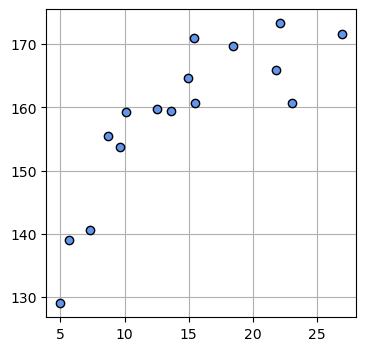

In [8]:
#data
plt.figure(figsize=(4,4))
plt.plot(
    X,
    T,
    "cornflowerblue",
    marker="o",
    linestyle="None",
    markeredgecolor="black"
)
plt.grid()
plt.show()

In [9]:
#線形基底関数モデル
import numpy as np
import matplotlib.pyplot as plt

#load data
data=np.load("ch5_data.npz")
X=data["X"]
X_min=0
X_max=data["X_max"]
N=data["N"]
T=data["T"]

In [10]:
#gauss function
def gauss(x,mu,s):
    y=np.exp(-((x-mu)**2/(2*s**2)))
    return y

In [11]:
print(X_min,X_max)

0 30


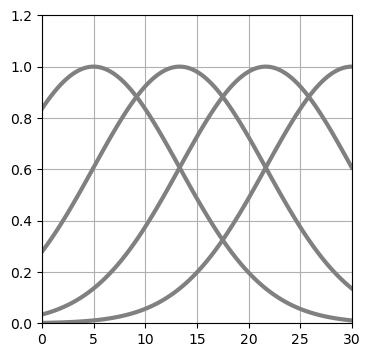

In [12]:
#main
M=4#number of function
mu=np.linspace(5,30,M)#mean parameter
s=mu[1]-mu[0]#standard diviation parameter
xb=np.linspace(X_min,X_max,100)
y=np.zeros((M,100))
for j in range(M):
    y[j,:]=gauss(xb,mu[j],s)#substitute gauss function
#drawing graph
plt.figure(figsize=(4,4))
for j in range(M):
    plt.plot(xb,y[j,:],"gray",linewidth=3)
plt.xlim(X_min,X_max)
plt.ylim(0,1.2)
plt.grid()
plt.show()



In [13]:
#Linear Basis Function model
def gauss_func(w,x):
    m=len(w)-1#number of gauss function #len(w) mean number of "W"s element 
    mu=np.linspace(5,30,m)#mean parameter
    s=mu[1]-mu[0]#standard deviation parameter
    y=np.zeros_like(x)
    #5-65
    for j in range(m):
        y=y+w[j]*gauss(x,mu[j],s)
    y=y+w[m]#phiを掛けないパラメータを最後に加える
    return y

In [14]:
#Line Basis function model's Mean Standard Error
def mse_gauss_func(x,t,w):
    y=gauss_func(w,x)
    mse=np.mean((y-t)**2)
    return mse


In [15]:
#LBFmodel's exact solution
def fit_gauss_func(x,t,m):
    mu=np.linspace(5,30,m)
    s=mu[1]-mu[0]
    n=x.shape[0]
    #計画行列phiを作成
    phi=np.ones((n,m+1))
    for j in range(m):
        phi[:,j]=gauss(x,mu[j],s)
        #w is calculated in exact solution
    w=np.linalg.inv(phi.T@phi)@phi.T@t
    return w


w= [29.39 75.66  2.86 98.28 54.88]
SD=3.98cm


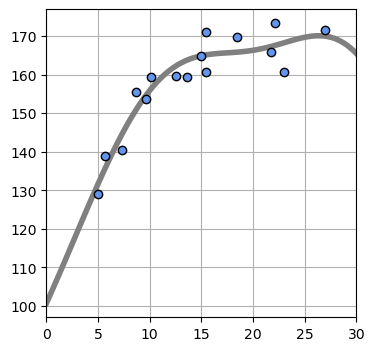

In [16]:
#gauss basis function is drawing
def show_gauss_func(w):
    x=np.linspace(X_min,X_max,100)
    y=gauss_func(w,x)
    plt.plot(x,y,"gray",linewidth=4)
#main
M=4
w=fit_gauss_func(X,T,M)
mse=mse_gauss_func(X,T,w)
#result
print("w=",np.round(w,2))
print(f"SD={np.sqrt(mse):.2f}cm")
#drawing graph
plt.figure(figsize=(4,4))
show_gauss_func(w)
plt.plot(
    X,T,"cornflowerblue",
    marker="o",linestyle="None",markeredgecolor="black",
)
plt.xlim(X_min,X_max)
plt.grid()
plt.show()

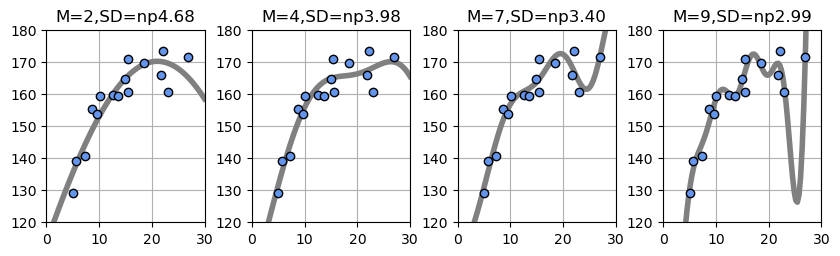

In [17]:
#list5-3-(8)
M=[2,4,7,9]
plt.figure(figsize=(10,2.5))
plt.subplots_adjust(wspace=0.3)
for i in range(len(M)):
    plt.subplot(1,len(M),i+1)
    w=fit_gauss_func(X,T,M[i])
    mse=mse_gauss_func(X,T,w)
    #drawing graph
    show_gauss_func(w)#line basis function
    plt.plot(
        X,T,"cornflowerblue",
        marker="o",linestyle="None",markeredgecolor="black",
    )
    plt.title(f"M={M[i]:d},SD=np{np.sqrt(mse):.2f}")
    plt.xlim(X_min,X_max)
    plt.ylim(120,180)
    plt.grid()

plt.show()

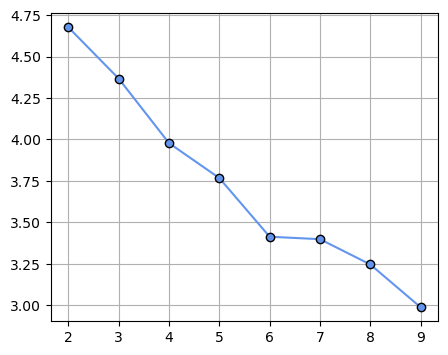

In [18]:
#main
M=range(2,10)
sd=np.zeros(len(M))
for i in range(len(M)):
    w=fit_gauss_func(X,T,M[i])
    sd[i]=np.sqrt(mse_gauss_func(X,T,w))
#drawing graph
plt.figure(figsize=(5,4))
plt.plot(M,sd,"cornflowerblue",marker="o",markeredgecolor="black")
plt.grid()
plt.show()

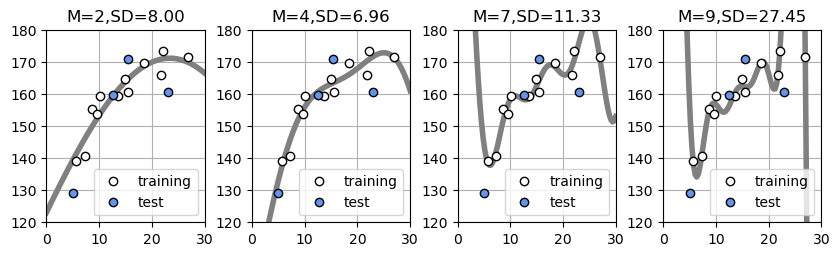

In [19]:
split=int(N/4)
X_test=X[:split]
T_test=T[:split]
X_train=X[split:]
T_train=T[split:]
#main
M=[2,4,7,9]
plt.figure(figsize=(10,2.5))
plt.subplots_adjust(wspace=0.3)
for i in range(len(M)):
    w=fit_gauss_func(X_train,T_train,M[i])
    sd=np.sqrt(mse_gauss_func(X_test,T_test,w))
    #drawing graph
    plt.subplot(1,len(M),i+1)
    show_gauss_func(w)
    plt.plot(
        X_train,T_train,"white",
        marker="o",linestyle="None",markeredgecolor="black",
        label="training"
    )
    plt.plot(
        X_test,T_test,"cornflowerblue",
        marker="o",linestyle="None",markeredgecolor="black",
        label="test"
    )
    plt.title(f"M={M[i]:d},SD={sd:.2f}")
    plt.legend(loc="lower right",fontsize=10,numpoints=1)
    plt.xlim(X_min,X_max)
    plt.ylim(120,180)
    plt.grid()
plt.show()
   

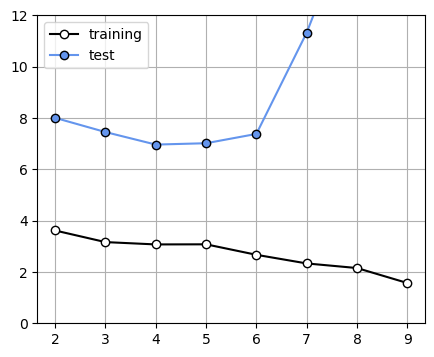

In [20]:
M=range(2,10)#M serched equal between 2 and 9.count
sd_train=np.zeros(len(M))
sd_test=np.zeros(len(M))
for i in range(len(M)):
    #w is calculated
    w=fit_gauss_func(X_train,T_train,M[i])
    #sd is calculated in training data
    sd_train[i]=np.sqrt(mse_gauss_func(X_train,T_train,w))
    #sd is calculated in test data
    sd_test[i]=np.sqrt(mse_gauss_func(X_test,T_test,w))
#drawing graph
plt.figure(figsize=(5,4))
plt.plot(
    M,sd_train,"black",
    marker="o",linestyle="-",
    markerfacecolor="white",markeredgecolor="black",
    label="training"
)
plt.plot( 
    M,sd_test,"cornflowerblue",
    marker="o",linestyle="-",
    markeredgecolor="black",
    label="test",
)
plt.legend(loc="upper left",fontsize=10)
plt.ylim(0,12)
plt.grid()
plt.show()

In [21]:
#k fold cross validation
def kfold_gauss_func(x,t,m,k):
    n=x.shape[0]#row（行の数）
    mse_train=np.zeros(k)
    mse_test=np.zeros(k)
    for i in range(0,k):
        #data split into testdata and traindata
        #index that testdata
        i_test=np.fmod(range(n),k)#ｎをｋで割ったときのあまり引数がRANGEの場合は０からK-1までを繰り返すｎ個の配列
        x_test=x[i_test==i]
        t_test=t[i_test==i]
        x_train=x[i_test!=i]#iでないもの
        t_train=t[i_test!=i]#iでないもの
        #ｗを訓練データで決める
        w=fit_gauss_func(x_train,t_train,m)
        #訓練データのＭＳＥを計算
        mse_train[i]=mse_gauss_func(x_train,t_train,w)
        #テストデータのMSEを計算
        mse_test[i]=mse_gauss_func(x_test,t_test,w)
    return mse_train,mse_test

In [30]:
np.fmod(range(20),5)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
      dtype=int32)

In [22]:
M=4
K=4
kfold_gauss_func(X,T,M,K)

(array([12.87927851,  9.81768697, 17.2615696 , 12.92270498]),
 array([ 39.65348229, 734.70782012,  18.30921743,  47.52459642]))

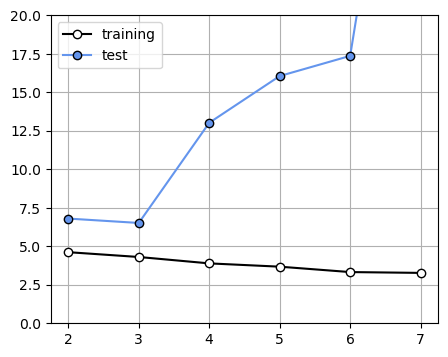

In [23]:
#main
M=range(2,8)
K=16
Cv_gauss_train=np.zeros((K,len(M)))
Cv_gauss_test=np.zeros((K,len(M)))
for i in range(0,len(M)):
    Cv_gauss_train[:,i],Cv_gauss_test[:,i]\
    =kfold_gauss_func(X,T,M[i],K)
#訓練データの各分割におけるMSEの平均の平方根
sd_Gauss_train=np.sqrt(np.mean(Cv_gauss_train,axis=0))
sd_Gauss_test=np.sqrt(np.mean(Cv_gauss_test,axis=0))
np.save("ch5_Gauss_test.npy",sd_Gauss_test)#結果の保存
#drawing graph
plt.figure(figsize=(5,4))
#traindataに対するMSEのグラフ
plt.plot(
    M,sd_Gauss_train,"black",
    marker="o",linestyle="-",
    markerfacecolor="white",markeredgecolor="black",
    label="training",
)
#testdataに対するMSEのグラフ
plt.plot(
    M,sd_Gauss_test,"cornflowerblue",
    marker="o",linestyle="-",
    markeredgecolor="black",
    label="test",
)
plt.legend(loc="upper left",fontsize=10)
plt.ylim(0,20)
plt.grid()
plt.show()

SD=4.37cm


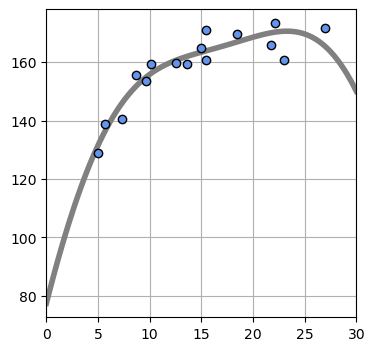

In [24]:
#main
M=3
w=fit_gauss_func(X,T,M)
sd=np.sqrt(mse_gauss_func(X,T,w))
#result
print(f"SD={sd:.2f}cm")
#drawaing graph
plt.figure(figsize=(4,4))
show_gauss_func(w)
plt.plot(
    X,T,"cornflowerblue",
    marker="o",linestyle="None",markeredgecolor="black",
)
plt.xlim(X_min,X_max)
plt.grid()
plt.show()

In [25]:
import numpy as np
import matplotlib.pyplot as plt

#load data
data=np.load("ch5_data.npz")
X=data["X"]
X_min=0
X_max=data["X_max"]
N=data["N"]
T=data["T"]
#modelA
def model_A(x,w):
    y=w[0]-w[1]*np.exp(-w[2]*x)
    return y
#modelA show
def show_model_A(w):
    x=np.linspace(X_min,X_max,100)
    y=model_A(x,w)
    plt.plot(x,y,"gray",linewidth=4)
# modelA's mean squared error(mse)
def mse_model_A(w,x,t):
    y=model_A(x,w)
    mse=np.mean((y-t)**2)
    return mse

In [26]:
from scipy.optimize import minimize
#modelAのパラメータ最適化
def fit_model_A(w_init,x,t):
    res=minimize(mse_model_A,w_init,args=(x,t),method="powell")
    return res.x

w0=169.04,w1=113.66,w2=0.22
SD=3.86cm


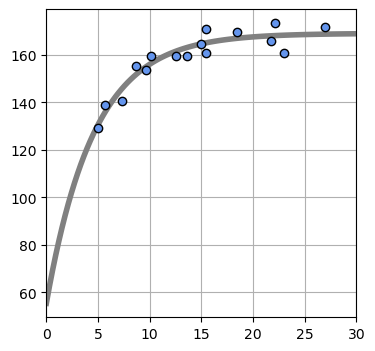

In [27]:
w_init=np.array([100.0,0.0,0.0])
w=fit_model_A(w_init,X,T)
sd=np.sqrt(mse_model_A(w,X,T))
#result
print(F"w0={w[0]:.2f},w1={w[1]:.2f},w2={w[2]:.2f}")
print(f"SD={sd:.2f}cm")
#drawing graph
plt.figure(figsize=(4,4))
show_model_A(w)
plt.plot(
    X,T,"cornflowerblue",
    marker="o",linestyle="None",markeredgecolor="black",
)
plt.xlim(X_min,X_max)
plt.grid()
plt.show()

Gauss(M=3)SD=6.51cm
ModelA SD=4.70cm


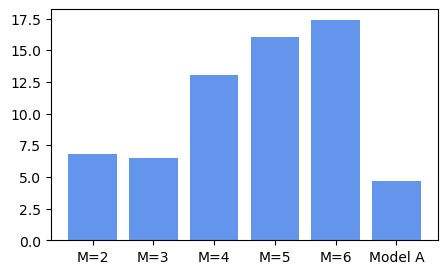

In [28]:
#交差検証モデルモデルA
def kfold_model_A(x,t,k):
    n=len(x)
    mse_train=np.zeros(k)
    mse_test=np.zeros(k)
    for i in range(0,k):
        i_test=np.fmod(range(n),k)
        x_test=x[i_test==i]
        t_test=t[i_test==i]
        x_train=x[i_test!=i]
        t_train=t[i_test!=i]
        w_init=np.array([169.04,113.66,0.22])
        w=fit_model_A(w_init,x_train,t_train)
        mse_train[i]=mse_model_A(w,x_train,t_train)
        mse_test[i]=mse_model_A(w,x_test,t_test)
    return mse_train,mse_test
#modelAの交差検定
K=16
Cv_A_train,Cv_A_test=kfold_model_A(X,T,K)
sd_A_test=np.sqrt(np.mean(Cv_A_test))
sd_Gauss_test=np.load("ch5_Gauss_test.npy")
SDs=np.append(sd_Gauss_test[0:5],sd_A_test)
#結果表示
print(f"Gauss(M=3)SD={sd_Gauss_test[1]:.2f}cm")
print(f"ModelA SD={sd_A_test:.2f}cm")
#drawing graph
M=range(6)
label=["M=2","M=3","M=4","M=5","M=6","Model A"]
plt.figure(figsize=(5,3))
plt.bar(
    M,SDs,facecolor="cornflowerblue",align="center",
    tick_label=label,
)
plt.show()